# Showing data

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Define the ticker symbols
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
sp600_table = table[0]

# Assuming "Date first added" is a column in sp600_table
sp600_table['Date added'] = pd.to_datetime(sp600_table['Date added'])

# Filter the DataFrame based on the condition
filtered_table = sp600_table[sp600_table['Date added'] < datetime(2010, 1, 1)]
start_date = '2010-01-01'

# Extract symbols as a list
symbols = filtered_table["Symbol"].tolist()

# Download the data
stock_data = yf.download(symbols, start=start_date, interval="1d", group_by="ticker")


[*********************100%%**********************]  290 of 290 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-01 -> 2023-12-25)')


In [ ]:
stock_data

AKAM                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2010-01-04   25.629999   26.059999   25.530001   25.920000   25.920000   
2010-01-05   25.950001   26.730000   25.770000   26.690001   26.690001   
2010-01-06   26.700001   26.860001   26.400000   26.469999   26.469999   
2010-01-07   26.650000   26.700001   26.120001   26.480000   26.480000   
2010-01-08   26.440001   26.730000   26.260000   26.480000   26.480000   
...                ...         ...         ...         ...         ...   
2023-12-18  119.480003  120.059998  118.860001  119.940002  119.940002   
2023-12-19  120.230003  120.610001  119.589996  120.180000  120.180000   
2023-12-20  120.180000  120.500000  119.199997  119.360001  119.360001   
2023-12-21  119.900002  120.110001  118.820000  119.489998  119.489998   
2023-12-22  119.879997  120.180000  119.269997  119.620003  119.620003   

                            COF                                      ...  \
             Volume        Open        High         Low       Close  ...   
Date                                                                 ...   
2010-01-04  3015600   38.660000   39.139999   38.549999   39.049999  ...   
2010-01-05  5421900   39.630001   40.630001   39.619999   40.590000  ...   
2010-01-06  2863900   40.349998   40.970001   40.200001   40.810001  ...   
2010-01-07  2919400   40.689999   43.110001   40.590000   42.830002  ...   
2010-01-08  2106600   42.430000   43.189999   42.009998   42.459999  ...   
...             ...         ...         ...         ...         ...  ...   
2023-12-18  1088500  130.080002  130.869995  129.600006  129.979996  ...   
2023-12-19  1537600  129.570007  132.059998  129.220001  131.520004  ...   
2023-12-20   965800  131.679993  132.139999  127.730003  127.730003  ...   
2023-12-21  1326300  128.889999  130.630005  128.630005  129.639999  ...   
2023-12-22   984600  130.149994  131.360001  129.190002  129.740005  ...   

                    GE                                            EL  \
                   Low       Close   Adj Close    Volume        Open   
Date                                                                   
2010-01-04   90.974602   92.776077   68.035347  11170816   24.344999   
2010-01-05   92.776077   93.256470   68.387634  10749611   24.195000   
2010-01-06   92.716026   92.776077   68.035347   9236570   24.309999   
2010-01-07   92.655975   97.580017   71.558189  30886702   24.209999   
2010-01-08   97.700111   99.681740   73.099464  19169701   24.434999   
...                ...         ...         ...       ...         ...   
2023-12-18  123.099998  123.639999  123.639999   4155000  144.000000   
2023-12-19  123.699997  125.940002  125.940002   4754300  144.779999   
2023-12-20  123.220001  123.370003  123.370003   4973600  148.330002   
2023-12-21  124.190002  126.970001  126.970001   4138200  146.470001   
2023-12-22  126.180000  126.690002  126.690002   3216200  144.020004   

                                                                     
                  High         Low       Close   Adj Close   Volume  
Date                                                                 
2010-01-04   24.445000   24.115000   24.270000   20.790508  3508400  
2010-01-05   24.245001   23.825001   24.174999   20.709131  3246000  
2010-01-06   24.445000   24.080000   24.250000   20.773376  4447200  
2010-01-07   24.600000   23.940001   24.555000   21.034647  3864800  
2010-01-08   24.684999   24.275000   24.655001   21.120306  2221600  
...                ...         ...         ...         ...      ...  
2023-12-18  144.940002  142.779999  142.880005  142.880005  2333500  
2023-12-19  151.190002  144.000000  149.020004  149.020004  3924800  
2023-12-20  149.570007  143.350006  143.610001  143.610001  2546000  
2023-12-21  146.919998  143.289993  145.460007  145.460007  1873900

In [ ]:
null_values = stock_data.isnull().sum()
# Display columns with null values and their counts
print(null_values[null_values > 0])

HWM   Open         1720
      High         1720
      Low          1720
      Close        1720
      Adj Close    1720
      Volume       1720
WRK   Open         1377
      High         1377
      Low          1377
      Close        1377
      Adj Close    1377
      Volume       1377
BF.B  Open         3518
      High         3518
      Low          3518
      Close        3518
      Adj Close    3518
      Volume       3518
dtype: int64


In [ ]:
for ticker, data in stock_data.items():
    stock_data[ticker].fillna(method='ffill', inplace=True)
    stock_data[ticker].fillna(method='bfill', inplace=True)

In [ ]:
# Assuming you've already fetched data into the stock_data DataFrame
columns_list = stock_data.columns.tolist()

# Print the list of columns
column_names = [f"{ticker}_{column}" for ticker, column in columns_list]

Text(0, 0.5, 'Frequency')

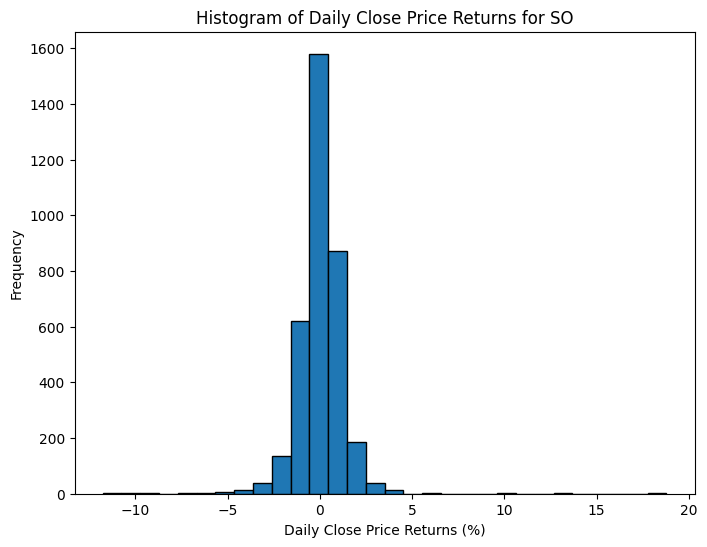

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import random

# Randomly select a symbol from the list of tickers
random_symbol = random.choice(symbols)

close_price = stock_data[random_symbol]['Close'].pct_change() * 100


plt.figure(figsize=(8, 6))
plt.hist(close_price, bins=30, edgecolor='black')
plt.title(f'Histogram of Daily Close Price Returns for {random_symbol}')
plt.xlabel('Daily Close Price Returns (%)')
plt.ylabel('Frequency')


In [ ]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed


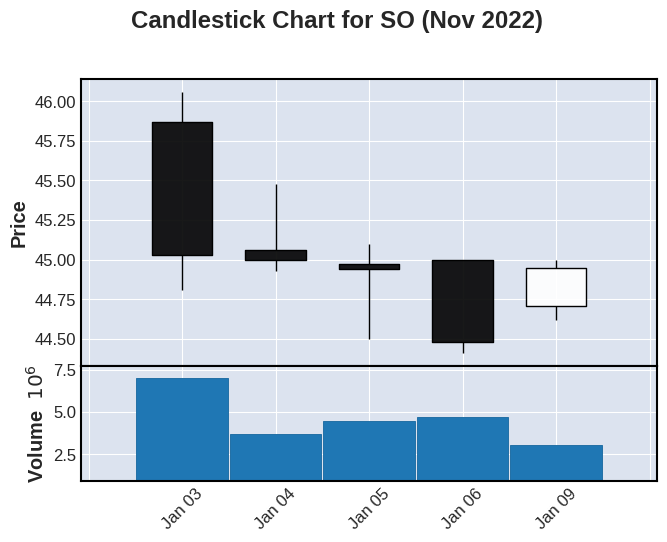

In [ ]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf

start_date = '2012-01-01'
end_date = '2012-01-10'
# Extract symbols as a list
symbols = filtered_table["Symbol"].tolist()

# Download the data
symbol_data = yf.download(random_symbol, start=start_date, end=end_date, interval="1d", group_by="ticker")

mpf.plot(symbol_data, type='candle', title=f'Candlestick Chart for {random_symbol} (Nov 2022)', ylabel='Price', volume=True)



# Train data

In [ ]:

from sklearn.model_selection import TimeSeriesSplit
import pandas as pd

# Define the ticker symbols
table = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
sp600_table = table[0]

stock_datas = {
    'AAPL': yf.download('AAPL', start='2010-01-01', end='2023-12-19'),
    'MSFT': yf.download('MSFT', start='2010-01-01', end='2023-12-19'),
    'AMZN': yf.download('AMZN', start='2010-01-01', end='2023-12-19'),
    'META': yf.download('META', start='2010-01-01', end='2023-12-19'),
    'GOOGL': yf.download('GOOGL', start='2010-01-01', end='2023-12-19')
}

n_splits = 5
ts_split = TimeSeriesSplit(n_splits=n_splits)

for ticker, data in stock_data.items():
    stock_data[ticker].fillna(method='ffill', inplace=True)
    stock_data[ticker].fillna(method='bfill', inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import tensorflow as tf
import keras
seed_value = 221
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
keras.utils.set_random_seed(seed_value)

In [ ]:
symboles=['AAPL', 'MSFT', 'AMZN','META','GOOGL']
window_size=10

X_train_cross_val=[]
Y_train_cross_val=[]

test_tickers=[]

X_test_cross_val=[]
Y_test_cross_val=[]

for symbole in symboles:
  symbol_data= stock_datas[symbole]
  time_series_data=symbol_data["Close"]
  X_train=[]
  Y_train=[]
  X_test=[]
  Y_test=[]
  for train_index, test_index in ts_split.split(time_series_data):
    train_data = time_series_data[train_index]
    test_data = time_series_data[test_index]
    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]
    for i in range(window_size, len(train_data)):
      x_train.append(train_data[i-window_size:i])
      y_train.append(train_data[i])

    for i in range(window_size, len(test_data)):
      x_test.append(test_data[i-window_size:i])
      y_test.append(test_data[i])

    test_tickers.append(symbole)

    x_train=np.array(x_train)
    y_train=np.array(y_train)


    x_test=np.array(x_test)
    y_test=np.array(y_test)

    X_train.append(x_train)
    Y_train.append(y_train)

    X_test.append(x_test)
    Y_test.append(y_test)
  X_train_cross_val.append(X_train)
  Y_train_cross_val.append(Y_train)
  X_test_cross_val.append(X_test)
  Y_test_cross_val.append(Y_test)

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

symboles = ['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']
window_size = 10

X_train_cross_val = []
Y_train_cross_val = []
X_test_cross_val = []
Y_test_cross_val = []
test_tickers = []

ts_split = TimeSeriesSplit()

for symbole in symboles:
    symbol_data = stock_datas[symbole]
    time_series_data = symbol_data["Close"]
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []

    for train_index, test_index in ts_split.split(time_series_data):
        train_data = time_series_data[train_index]
        test_data = time_series_data[test_index]
        x_train = []
        y_train = []
        x_test = []
        y_test = []

        for i in range(window_size, len(train_data)):
            x_train.append(train_data[i - window_size:i])
            y_train.append(train_data[i])

        for i in range(window_size, len(test_data)):
            x_test.append(test_data[i - window_size:i])
            y_test.append(test_data[i])

        test_tickers.append(symbole)

        x_train = np.array(x_train)
        y_train = np.array(y_train)
        x_test = np.array(x_test)
        y_test = np.array(y_test)

        X_train.append(x_train)
        Y_train.append(y_train)
        X_test.append(x_test)
        Y_test.append(y_test)

    X_train_cross_val.append(np.concatenate(X_train))
    Y_train_cross_val.append(np.concatenate(Y_train))
    X_test_cross_val.append(np.concatenate(X_test))
    Y_test_cross_val.append(np.concatenate(Y_test))

In [ ]:
X_test_cross_val[1]

array([[ 30.97999954,  30.64999962,  30.5       , ...,  30.20999908,
         29.89999962,  29.71999931],
       [ 30.64999962,  30.5       ,  30.76000023, ...,  29.89999962,
         29.71999931,  29.27000046],
       [ 30.5       ,  30.76000023,  30.73999977, ...,  29.71999931,
         29.27000046,  29.75      ],
       ...,
       [378.91000366, 374.51000977, 369.14001465, ..., 371.29998779,
        374.38000488, 374.36999512],
       [374.51000977, 369.14001465, 372.51998901, ..., 374.38000488,
        374.36999512, 365.92999268],
       [369.14001465, 372.51998901, 368.79998779, ..., 374.36999512,
        365.92999268, 370.73001099]])

In [ ]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

X_test=np.array(X_test)
Y_test=np.array(Y_test)

<ipython-input-14-45c598736212>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train=np.array(X_train)
<ipython-input-14-45c598736212>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y_train=np.array(Y_train)
<ipython-input-14-45c598736212>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test=np.array(X_test)
<ipython-input-

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Y_train = Y_train.reshape(-1, 1)  # Reshaping to (24570, 1)

train = np.concatenate((X_train, Y_train), axis=1)



scaler = MinMaxScaler(feature_range=(0, 1))
train_normalized=scaler.fit_transform(train)


In [ ]:
X_test[i].shape

(575, 10)

In [ ]:
Y_test = Y_test.reshape(-1, 1)  # Reshaping to (24570, 1)

test = np.concatenate((X_test, Y_test), axis=1)

In [ ]:
Y_test.shape

(25,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_normalized=scaler.fit_transform(train)
test_normalized=scaler.transform(test)

In [ ]:
X_train = train[:, :-1]  # All columns except the last one
Y_train = train[:, -1]     # Last column

X_test = test[:, :-1]  # All columns except the last one
Y_test = test[:, -1]     # Last column

In [ ]:
X_train = train_normalized[:, :-1]  # All columns except the last one
Y_train = train_normalized[:, -1]     # Last column

X_test = test_normalized[:, :-1]  # All columns except the last one
Y_test = test_normalized[:, -1]     # Last column

# Not Scaled

## LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional, LSTM




def LSTM_Model(window_size):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

def BILSTM_Model(window_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(window_size, 1)))
    model.add(Bidirectional(LSTM(units=50)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

def GRU_Model(window_size):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(window_size, 1)))
    model.add(GRU(units=50))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

def MLP_Model(window_size):
    model = Sequential()
    model.add(Flatten(input_shape=(window_size, 1)))  # Flatten the input sequences
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

def CNN_Model(window_size):

    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

def ConvLSTM_Model(window_size):

    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model



## LSTM

In [ ]:

# Example usage:
window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  lstm_model = LSTM_Model(window_size)
  history = lstm_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(lstm_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))


Epoch 1/15
274/274 [==============================] - 7s 12ms/step - loss: 528.6303 - mean_squared_error: 528.6303 - mean_absolute_error: 14.0274 - mean_absolute_percentage_error: 64.1405
Epoch 2/15
274/274 [==============================] - 4s 15ms/step - loss: 505.8302 - mean_squared_error: 505.8302 - mean_absolute_error: 13.8756 - mean_absolute_percentage_error: 66.4806
Epoch 3/15
274/274 [==============================] - 4s 15ms/step - loss: 153.2580 - mean_squared_error: 153.2580 - mean_absolute_error: 3.6416 - mean_absolute_percentage_error: 8.9535
Epoch 4/15
274/274 [==============================] - 3s 12ms/step - loss: 27.1085 - mean_squared_error: 27.1085 - mean_absolute_error: 1.6221 - mean_absolute_percentage_error: 4.3091
Epoch 5/15
274/274 [==============================] - 3s 12ms/step - loss: 11.3376 - mean_squared_error: 11.3376 - mean_absolute_error: 1.2609 - mean_absolute_percentage_error: 4.1202
Epoch 6/15
274/274 [==============================] - 4s 15ms/step - l

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [236.22432022 236.22432022   5.51907642   3.30844769]


274/274 [==============================] - 2s 5ms/step
True Value of MEAPE:  0.05509821454138181


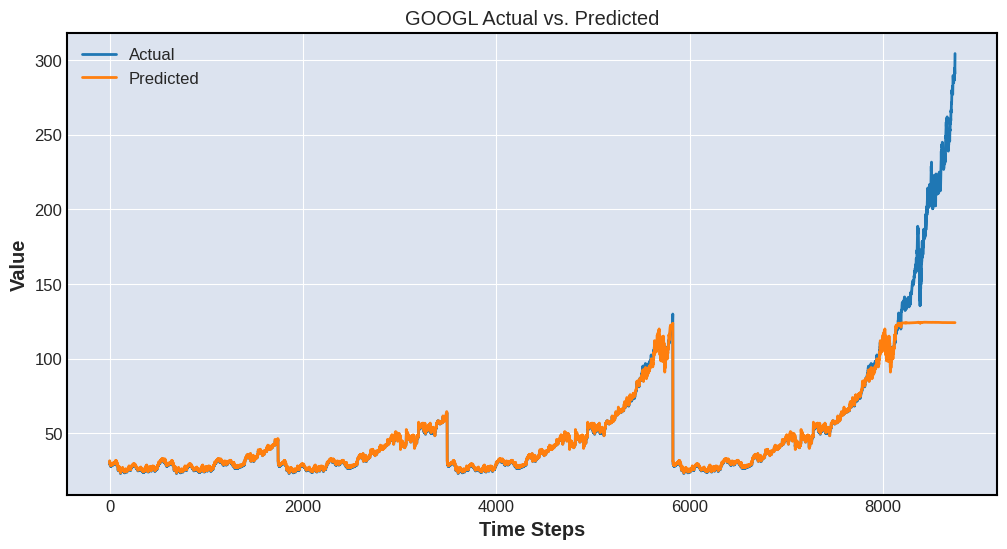

In [ ]:

lstm_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = lstm_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## GRU

In [ ]:

# Example usage:


# Example usage:
window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  gru_model = GRU_Model(window_size)
  history = gru_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(gru_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))



Epoch 1/15
274/274 [==============================] - 9s 17ms/step - loss: 511.4911 - mean_squared_error: 511.4911 - mean_absolute_error: 13.3533 - mean_absolute_percentage_error: 59.9207
Epoch 2/15
274/274 [==============================] - 3s 13ms/step - loss: 128.4388 - mean_squared_error: 128.4388 - mean_absolute_error: 3.2923 - mean_absolute_percentage_error: 7.3152
Epoch 3/15
274/274 [==============================] - 3s 12ms/step - loss: 24.2091 - mean_squared_error: 24.2091 - mean_absolute_error: 1.9491 - mean_absolute_percentage_error: 5.9754
Epoch 4/15
274/274 [==============================] - 4s 15ms/step - loss: 9.6593 - mean_squared_error: 9.6593 - mean_absolute_error: 1.5483 - mean_absolute_percentage_error: 5.5380
Epoch 5/15
274/274 [==============================] - 4s 16ms/step - loss: 7.5597 - mean_squared_error: 7.5597 - mean_absolute_error: 1.5532 - mean_absolute_percentage_error: 5.8545
Epoch 6/15
274/274 [==============================] - 3s 13ms/step - loss: 5.1

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [299.66431084 299.66431084   8.23561521   6.17150011]


274/274 [==============================] - 2s 5ms/step
True Value of MEAPE:  0.0640038852108465


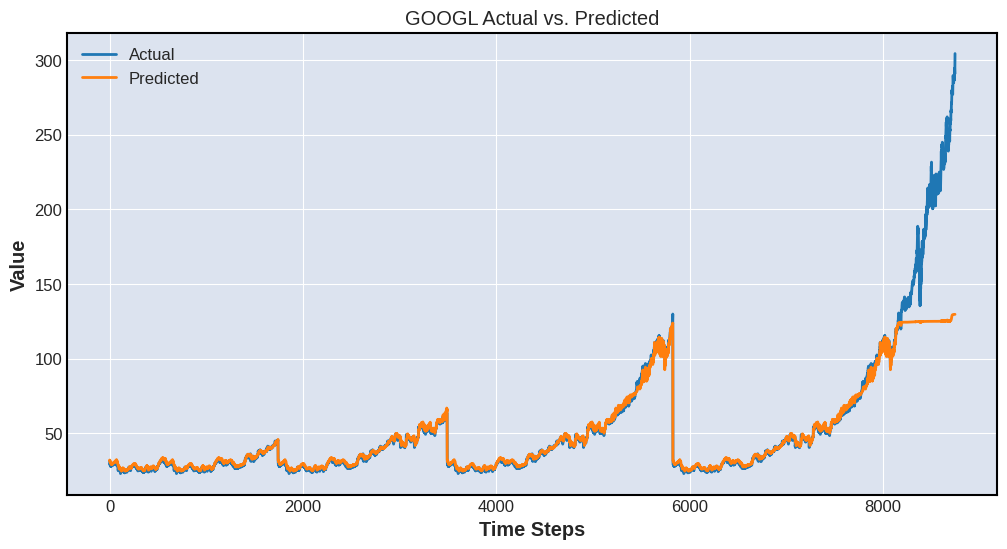

In [ ]:

gru_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = gru_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## BISLTM

In [ ]:


window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  bilstm_model = BILSTM_Model(window_size)
  history = bilstm_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(bilstm_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))



Epoch 1/15
274/274 [==============================] - 14s 21ms/step - loss: 355.3907 - mean_squared_error: 355.3907 - mean_absolute_error: 9.3538 - mean_absolute_percentage_error: 40.3903
Epoch 2/15
274/274 [==============================] - 8s 28ms/step - loss: 21.1722 - mean_squared_error: 21.1722 - mean_absolute_error: 1.7418 - mean_absolute_percentage_error: 5.5192
Epoch 3/15
274/274 [==============================] - 6s 21ms/step - loss: 8.8704 - mean_squared_error: 8.8704 - mean_absolute_error: 1.3148 - mean_absolute_percentage_error: 4.4806
Epoch 4/15
274/274 [==============================] - 7s 24ms/step - loss: 7.7137 - mean_squared_error: 7.7137 - mean_absolute_error: 1.3056 - mean_absolute_percentage_error: 4.6663
Epoch 5/15
274/274 [==============================] - 7s 25ms/step - loss: 7.7475 - mean_squared_error: 7.7475 - mean_absolute_error: 1.3164 - mean_absolute_percentage_error: 4.6097
Epoch 6/15
274/274 [==============================] - 6s 21ms/step - loss: 7.5854 

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [138.50942116 138.50942116   5.63983278   4.13203149]


274/274 [==============================] - 4s 6ms/step
True Value of MEAPE:  0.050842126562005194


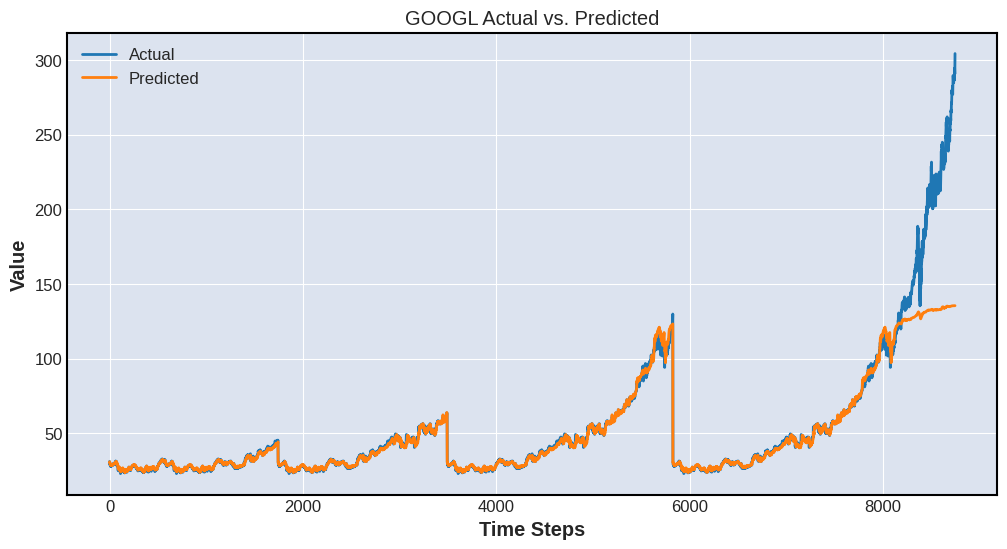

In [ ]:

bilstm_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = bilstm_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## MLP

In [ ]:

# Example usage:
window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  mlp_model = MLP_Model(window_size)
  history = mlp_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(mlp_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))



Epoch 1/15
274/274 [==============================] - 1s 2ms/step - loss: 11.7650 - mean_squared_error: 11.7650 - mean_absolute_error: 1.3331 - mean_absolute_percentage_error: 5.0370
Epoch 2/15
274/274 [==============================] - 1s 2ms/step - loss: 1.4071 - mean_squared_error: 1.4071 - mean_absolute_error: 0.6773 - mean_absolute_percentage_error: 2.5166
Epoch 3/15
274/274 [==============================] - 1s 2ms/step - loss: 1.1066 - mean_squared_error: 1.1066 - mean_absolute_error: 0.5998 - mean_absolute_percentage_error: 2.2409
Epoch 4/15
274/274 [==============================] - 1s 2ms/step - loss: 1.0748 - mean_squared_error: 1.0748 - mean_absolute_error: 0.5894 - mean_absolute_percentage_error: 2.1767
Epoch 5/15
274/274 [==============================] - 1s 2ms/step - loss: 1.1646 - mean_squared_error: 1.1646 - mean_absolute_error: 0.6510 - mean_absolute_percentage_error: 2.4482
Epoch 6/15
274/274 [==============================] - 1s 2ms/step - loss: 0.8453 - mean_squar

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [12.99288006 12.99288006  2.14980416  2.15525165]


274/274 [==============================] - 0s 1ms/step
True Value of MEAPE:  0.0185801777873366


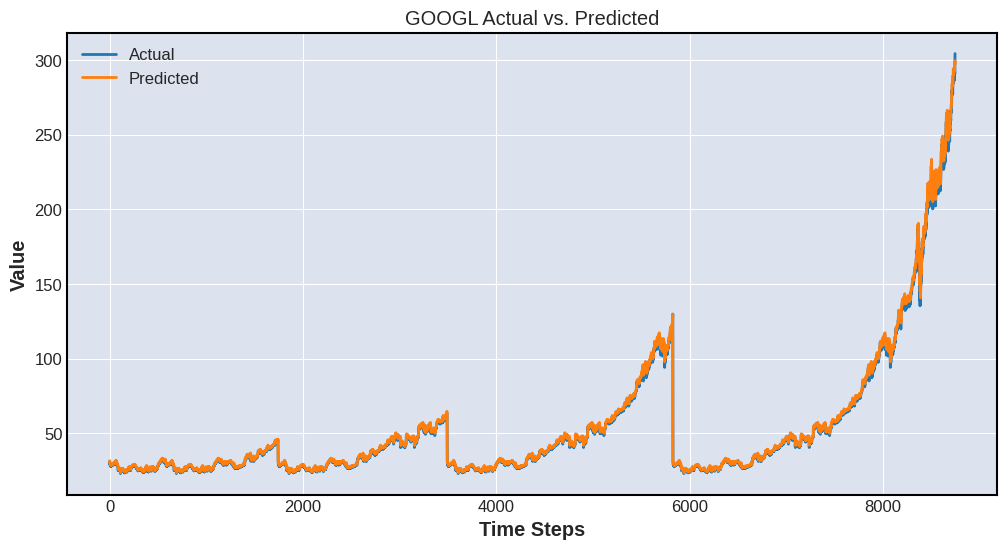

In [ ]:

mlp_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = mlp_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## CNN

In [ ]:

window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  cnn_model = CNN_Model(window_size)
  history = cnn_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(cnn_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))




Epoch 1/15
274/274 [==============================] - 2s 3ms/step - loss: 82.4143 - mean_squared_error: 82.4143 - mean_absolute_error: 2.9355 - mean_absolute_percentage_error: 10.9632
Epoch 2/15
274/274 [==============================] - 1s 3ms/step - loss: 1.6188 - mean_squared_error: 1.6188 - mean_absolute_error: 0.7158 - mean_absolute_percentage_error: 2.7015
Epoch 3/15
274/274 [==============================] - 1s 3ms/step - loss: 1.5727 - mean_squared_error: 1.5727 - mean_absolute_error: 0.7060 - mean_absolute_percentage_error: 2.6528
Epoch 4/15
274/274 [==============================] - 1s 3ms/step - loss: 1.5604 - mean_squared_error: 1.5604 - mean_absolute_error: 0.7033 - mean_absolute_percentage_error: 2.6401
Epoch 5/15
274/274 [==============================] - 1s 3ms/step - loss: 1.6070 - mean_squared_error: 1.6070 - mean_absolute_error: 0.7110 - mean_absolute_percentage_error: 2.6476
Epoch 6/15
274/274 [==============================] - 1s 3ms/step - loss: 1.7345 - mean_squa

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [20.70471964 20.70471964  2.56792905  2.39516239]


274/274 [==============================] - 1s 2ms/step
True Value of MEAPE:  0.017927348185412396


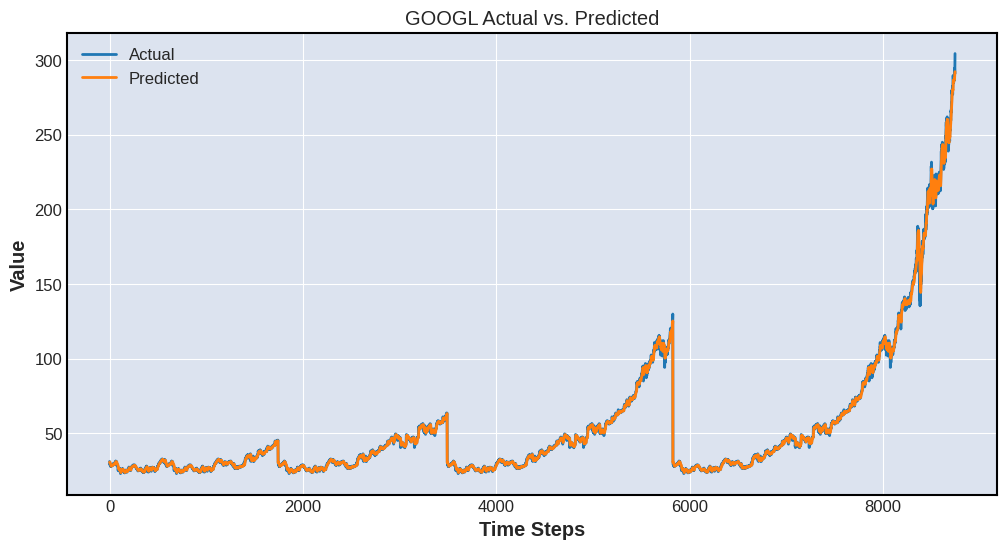

In [ ]:

cnn_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = cnn_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## CONV_LSTM

In [ ]:


window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  conv_lstm_model = ConvLSTM_Model(window_size)
  history = conv_lstm_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(conv_lstm_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))





Epoch 1/15
274/274 [==============================] - 6s 11ms/step - loss: 134.7751 - mean_squared_error: 134.7751 - mean_absolute_error: 4.1293 - mean_absolute_percentage_error: 14.3258
Epoch 2/15
274/274 [==============================] - 2s 9ms/step - loss: 4.6897 - mean_squared_error: 4.6897 - mean_absolute_error: 1.1767 - mean_absolute_percentage_error: 4.6509
Epoch 3/15
274/274 [==============================] - 2s 7ms/step - loss: 2.7618 - mean_squared_error: 2.7618 - mean_absolute_error: 0.9477 - mean_absolute_percentage_error: 3.7570
Epoch 4/15
274/274 [==============================] - 2s 7ms/step - loss: 2.8011 - mean_squared_error: 2.8011 - mean_absolute_error: 1.0593 - mean_absolute_percentage_error: 4.4887
Epoch 5/15
274/274 [==============================] - 2s 7ms/step - loss: 2.9100 - mean_squared_error: 2.9100 - mean_absolute_error: 1.0665 - mean_absolute_percentage_error: 4.5172
Epoch 6/15
274/274 [==============================] - 2s 7ms/step - loss: 2.2468 - mean_s

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [41.08440366 41.08440366  3.29542811  3.24423106]


274/274 [==============================] - 1s 3ms/step
True Value of MEAPE:  0.03858188076661579


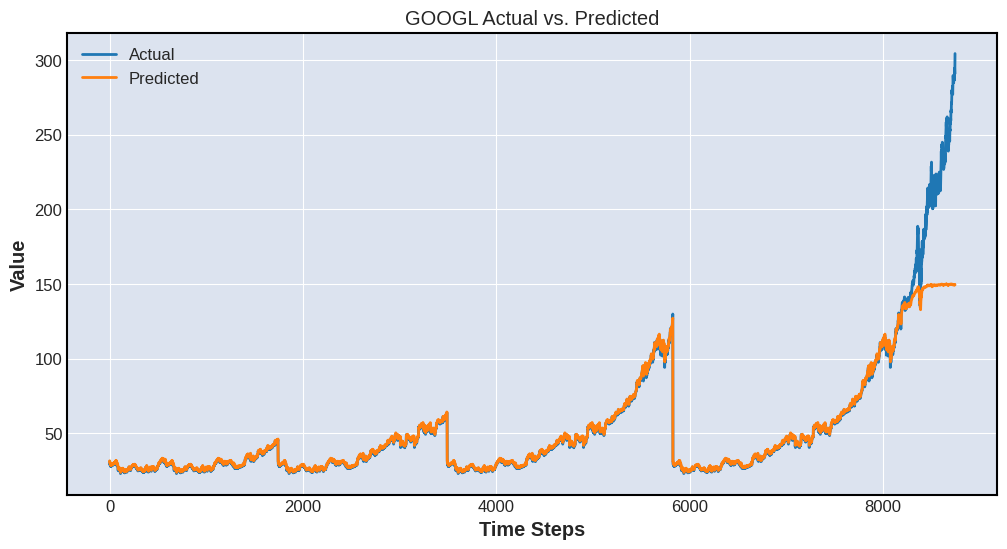

In [ ]:

conv_lstm_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = conv_lstm_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

# Scaled

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

symboles = ['AAPL', 'MSFT', 'AMZN', 'META', 'GOOGL']
window_size = 10

X_train_cross_val = []
Y_train_cross_val = []
X_test_cross_val = []
Y_test_cross_val = []
test_tickers = []

ts_split = TimeSeriesSplit()

for symbole in symboles:
    symbol_data = stock_datas[symbole]
    time_series_data = symbol_data["Close"]
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    scaler = MinMaxScaler(feature_range=(0, 1))
    for train_index, test_index in ts_split.split(time_series_data):
        train_data = time_series_data[train_index]
        test_data = time_series_data[test_index]
        train_data=scaler.fit_transform(train_data.values.reshape(-1, 1))
        test_data=scaler.transform(test_data.values.reshape(-1, 1))
        x_train = []
        y_train = []
        x_test = []
        y_test = []

        for i in range(window_size, len(train_data)):
            x_train.append(train_data[i - window_size:i])
            y_train.append(train_data[i])

        for i in range(window_size, len(test_data)):
            x_test.append(test_data[i - window_size:i])
            y_test.append(test_data[i])

        test_tickers.append(symbole)

        x_train = np.array(x_train)
        y_train = np.array(y_train)
        x_test = np.array(x_test)
        y_test = np.array(y_test)

        X_train.append(x_train)
        Y_train.append(y_train)
        X_test.append(x_test)
        Y_test.append(y_test)

    X_train_cross_val.append(np.concatenate(X_train))
    Y_train_cross_val.append(np.concatenate(Y_train))
    X_test_cross_val.append(np.concatenate(X_test))
    Y_test_cross_val.append(np.concatenate(Y_test))

In [ ]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)

X_test=np.array(X_test)
Y_test=np.array(Y_test)

## LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Bidirectional, LSTM




def LSTM_Model(window_size):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

def BILSTM_Model(window_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(window_size, 1)))
    model.add(Bidirectional(LSTM(units=50)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

def GRU_Model(window_size):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(window_size, 1)))
    model.add(GRU(units=50))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

def MLP_Model(window_size):
    model = Sequential()
    model.add(Flatten(input_shape=(window_size, 1)))  # Flatten the input sequences
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Output layer

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

def CNN_Model(window_size):

    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model

def ConvLSTM_Model(window_size):

    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_squared_error", "mean_absolute_error", "mean_absolute_percentage_error"])
    return model



## LSTM

In [ ]:

# Example usage:
window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  lstm_model = LSTM_Model(window_size)
  history = lstm_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(lstm_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))


Epoch 1/15
274/274 [==============================] - 8s 13ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 8687.7412
Epoch 2/15
274/274 [==============================] - 6s 23ms/step - loss: 3.7451e-04 - mean_squared_error: 3.7451e-04 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 7330.5967
Epoch 3/15
274/274 [==============================] - 5s 19ms/step - loss: 3.7080e-04 - mean_squared_error: 3.7080e-04 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 6454.5000
Epoch 4/15
274/274 [==============================] - 3s 13ms/step - loss: 2.8257e-04 - mean_squared_error: 2.8257e-04 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 3978.6160
Epoch 5/15
274/274 [==============================] - 3s 12ms/step - loss: 2.2672e-04 - mean_squared_error: 2.2672e-04 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 5163.7520
Epoch 6/15
274/274 [=======================

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [0.0126695  0.0126695  0.05930755 3.67023005]


274/274 [==============================] - 3s 6ms/step
True Value of MEAPE:  0.0541302496251953


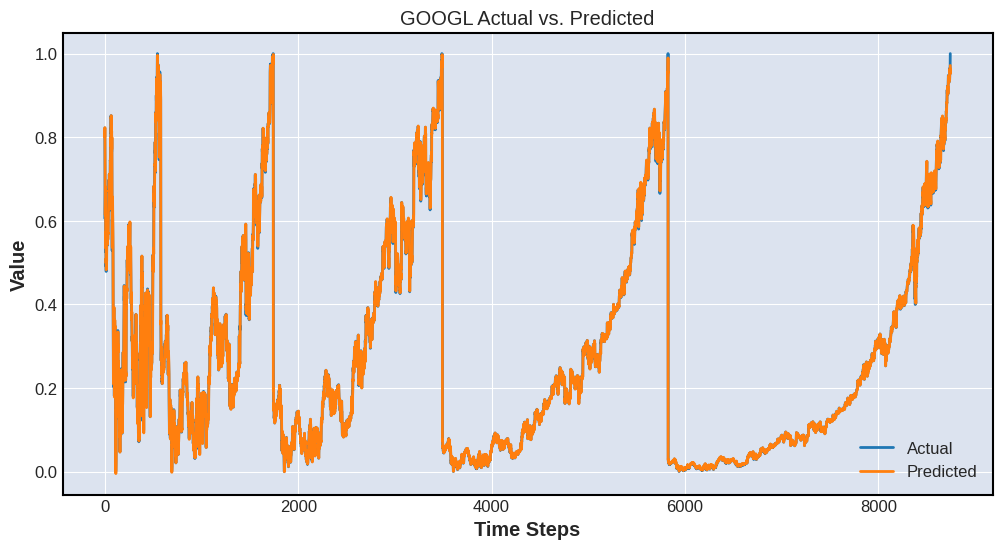

In [ ]:

lstm_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = lstm_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## GRU

In [ ]:

# Example usage:


# Example usage:
window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  gru_model = GRU_Model(window_size)
  history = gru_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(gru_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))



Epoch 1/15
274/274 [==============================] - 7s 12ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 4773.1992
Epoch 2/15
274/274 [==============================] - 4s 15ms/step - loss: 1.7345e-04 - mean_squared_error: 1.7345e-04 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 8671.8721
Epoch 3/15
274/274 [==============================] - 4s 14ms/step - loss: 1.9901e-04 - mean_squared_error: 1.9901e-04 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 6216.0654
Epoch 4/15
274/274 [==============================] - 3s 12ms/step - loss: 2.0325e-04 - mean_squared_error: 2.0325e-04 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 6234.6294
Epoch 5/15
274/274 [==============================] - 3s 12ms/step - loss: 1.8770e-04 - mean_squared_error: 1.8770e-04 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 5120.8110
Epoch 6/15
274/274 [=======================

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [0.03967622 0.03967622 0.0994796  5.76011581]


274/274 [==============================] - 2s 5ms/step
True Value of MEAPE:  0.3106913845758228


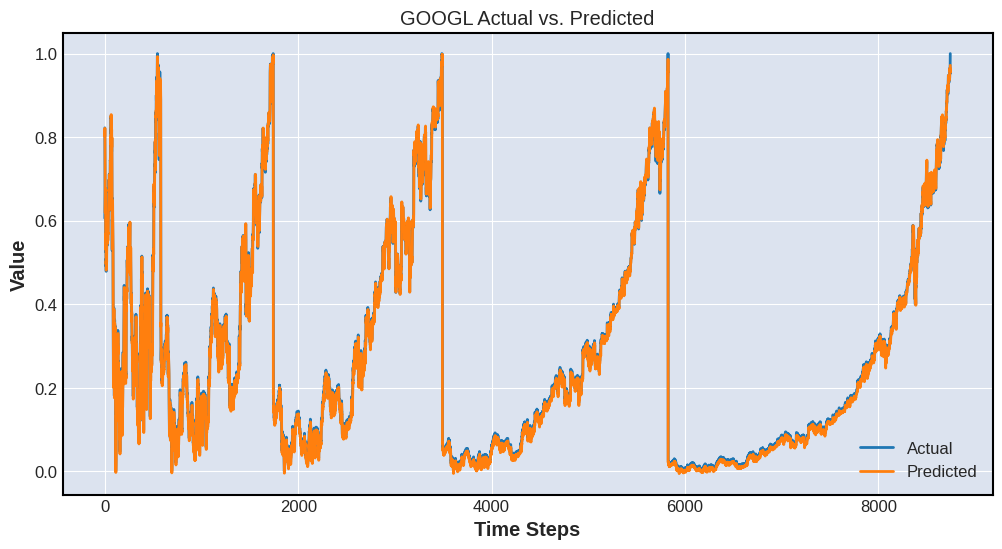

In [ ]:

gru_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = gru_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## BISLTM

In [ ]:


window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  bilstm_model = BILSTM_Model(window_size)
  history = bilstm_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(bilstm_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))



Epoch 1/15
274/274 [==============================] - 14s 22ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 4630.2437
Epoch 2/15
274/274 [==============================] - 7s 26ms/step - loss: 4.0677e-04 - mean_squared_error: 4.0677e-04 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 6254.0771
Epoch 3/15
274/274 [==============================] - 5s 20ms/step - loss: 3.4912e-04 - mean_squared_error: 3.4912e-04 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 7819.5229
Epoch 4/15
274/274 [==============================] - 7s 25ms/step - loss: 2.4958e-04 - mean_squared_error: 2.4958e-04 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 7369.8916
Epoch 5/15
274/274 [==============================] - 5s 20ms/step - loss: 2.0059e-04 - mean_squared_error: 2.0059e-04 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 3364.8621
Epoch 6/15
274/274 [======================

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [0.02720193 0.02720193 0.08471147 4.98919525]


274/274 [==============================] - 3s 7ms/step
True Value of MEAPE:  0.26008987053162236


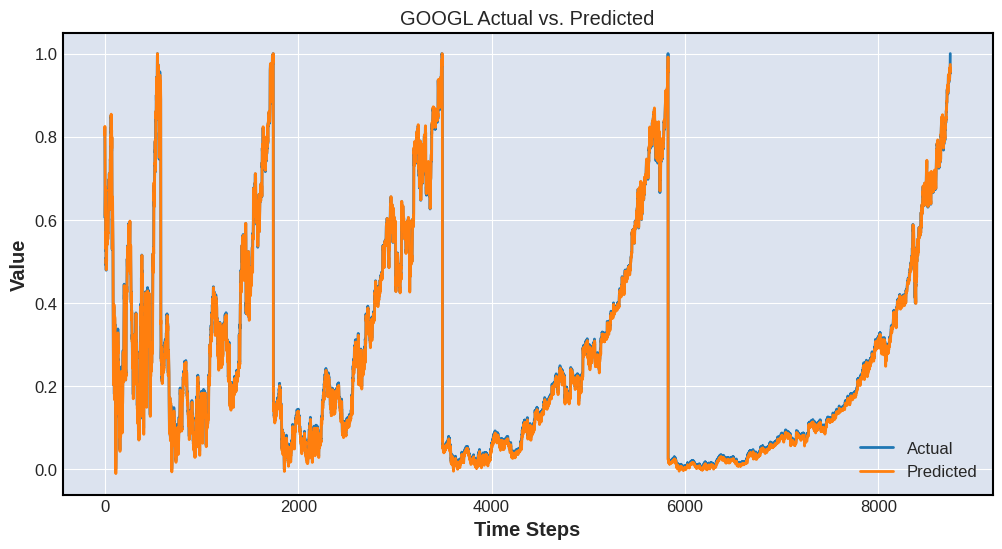

In [ ]:

bilstm_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = bilstm_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## MLP

In [ ]:

# Example usage:
window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  mlp_model = MLP_Model(window_size)
  history = mlp_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(mlp_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))



Epoch 1/15
274/274 [==============================] - 1s 2ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 7848.7847
Epoch 2/15
274/274 [==============================] - 1s 3ms/step - loss: 2.0025e-04 - mean_squared_error: 2.0025e-04 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 4258.4990
Epoch 3/15
274/274 [==============================] - 1s 3ms/step - loss: 1.9867e-04 - mean_squared_error: 1.9867e-04 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 4142.4048
Epoch 4/15
274/274 [==============================] - 1s 3ms/step - loss: 1.6776e-04 - mean_squared_error: 1.6776e-04 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 3763.9741
Epoch 5/15
274/274 [==============================] - 1s 3ms/step - loss: 1.7377e-04 - mean_squared_error: 1.7377e-04 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 3593.3215
Epoch 6/15
274/274 [============================

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [9.83146729e-04 9.83146729e-04 2.09521133e-02 1.81924384e+00]


274/274 [==============================] - 0s 1ms/step
True Value of MEAPE:  0.059198581025834376


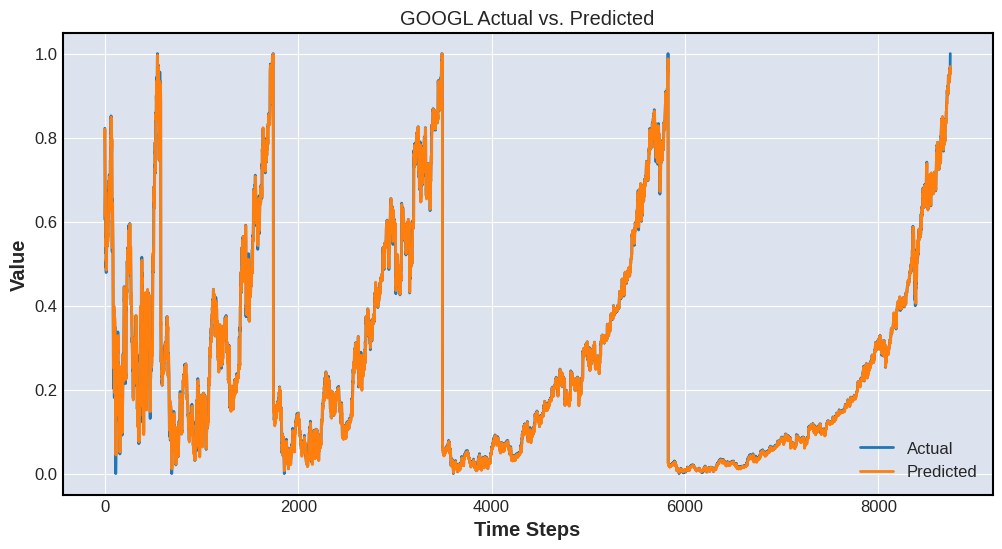

In [ ]:

mlp_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = mlp_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## CNN

In [ ]:

window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  cnn_model = CNN_Model(window_size)
  history = cnn_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(cnn_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))




Epoch 1/15
274/274 [==============================] - 2s 3ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 18561.4922
Epoch 2/15
274/274 [==============================] - 1s 5ms/step - loss: 4.7297e-04 - mean_squared_error: 4.7297e-04 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 8586.1592
Epoch 3/15
274/274 [==============================] - 1s 5ms/step - loss: 4.2158e-04 - mean_squared_error: 4.2158e-04 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 8617.9863
Epoch 4/15
274/274 [==============================] - 1s 4ms/step - loss: 3.7434e-04 - mean_squared_error: 3.7434e-04 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 7958.6240
Epoch 5/15
274/274 [==============================] - 1s 3ms/step - loss: 3.4674e-04 - mean_squared_error: 3.4674e-04 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 6661.5811
Epoch 6/15
274/274 [===========================

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [2.86430796e-03 2.86430796e-03 3.68952919e-02 2.93834538e+00]


274/274 [==============================] - 1s 2ms/step
True Value of MEAPE:  0.09881190921459358


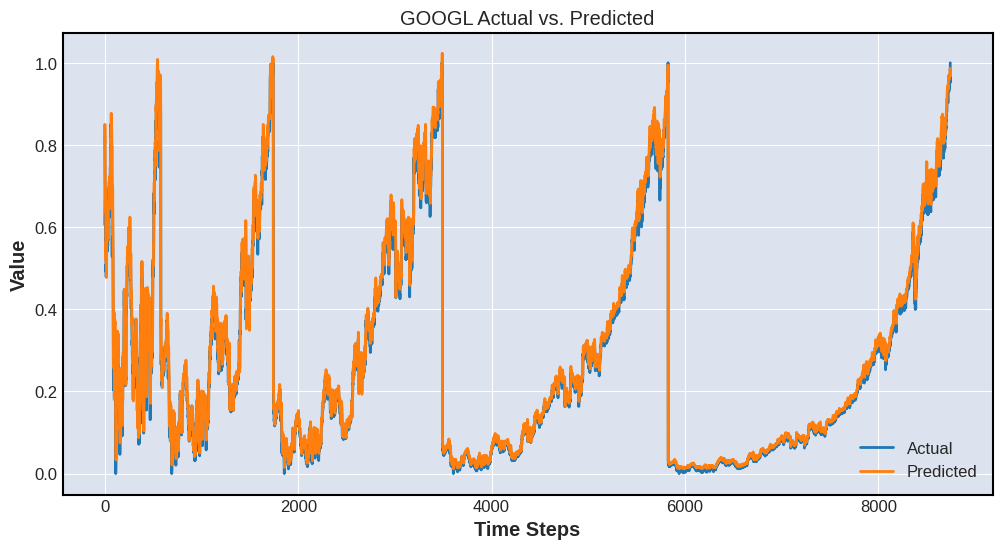

In [ ]:

cnn_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = cnn_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## CONV_LSTM

In [ ]:


window_size = 10  # Replace with your desired window size
results=[]
for i in range(len(X_train_cross_val)):
  conv_lstm_model = ConvLSTM_Model(window_size)
  history = conv_lstm_model.fit( X_train_cross_val[i] , Y_train_cross_val[i] , epochs=15, batch_size=32)
  results.append(conv_lstm_model.evaluate(X_test_cross_val[i] , Y_test_cross_val[i]))





Epoch 1/15
274/274 [==============================] - 5s 8ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 19088.2520
Epoch 2/15
274/274 [==============================] - 3s 10ms/step - loss: 5.6802e-04 - mean_squared_error: 5.6802e-04 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 9295.5947
Epoch 3/15
274/274 [==============================] - 3s 10ms/step - loss: 5.1619e-04 - mean_squared_error: 5.1619e-04 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 9258.0576
Epoch 4/15
274/274 [==============================] - 2s 8ms/step - loss: 4.1334e-04 - mean_squared_error: 4.1334e-04 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 7446.2856
Epoch 5/15
274/274 [==============================] - 2s 8ms/step - loss: 3.6293e-04 - mean_squared_error: 3.6293e-04 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 6965.1318
Epoch 6/15
274/274 [=========================

In [ ]:

mean_data = np.mean(results, axis=0)
print("Mean of elements (element-wise):", mean_data)


Mean of elements (element-wise): [0.00711797 0.00711797 0.04953049 3.24343913]


274/274 [==============================] - 1s 3ms/step
True Value of MEAPE:  0.08025037901790566


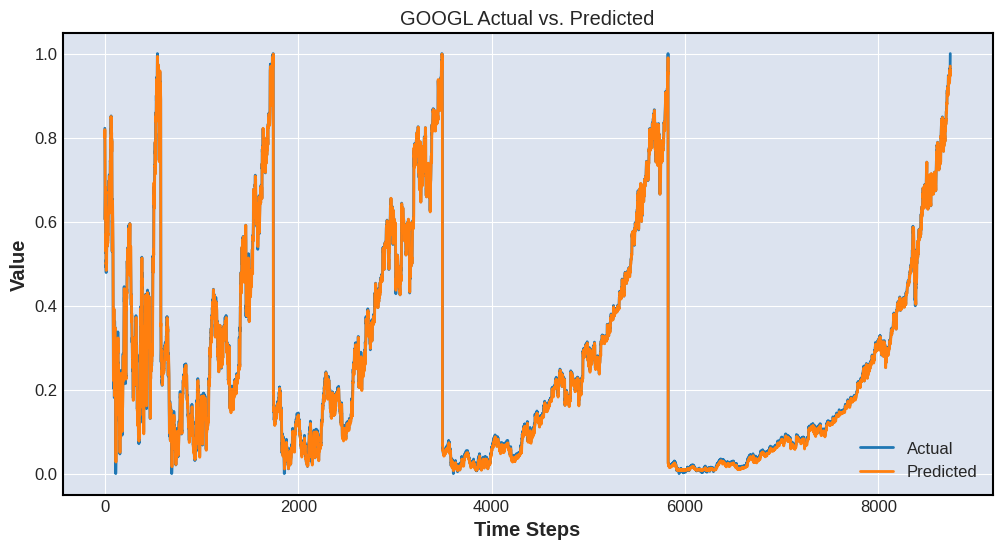

In [ ]:

conv_lstm_model.evaluate(X_train_cross_val[1], Y_train_cross_val[1])

# Make predictions on the test data
predictions = conv_lstm_model.predict(np.array(X_train_cross_val[1]))

# Plot the actual vs. predicted values
print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_train_cross_val[1]))
plt.figure(figsize=(12, 6))
plt.plot(Y_train_cross_val[1], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(symboles[i] + ' Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

## CONV_LSTM

In [ ]:

# Example usage:
window_size = 10  # Replace with your desired window size
conv_lstm_model = ConvLSTM_Model(window_size)
history=conv_lstm_model.fit( X_train , Y_train , epochs=5, batch_size=32)


In [ ]:
for i in range(len(symboles)):

    # Evaluate the model on test data
    conv_lstm_model.evaluate(X_test[i], Y_test[i])

    # Make predictions on the test data
    predictions = conv_lstm_model.predict(np.array(X_test[i]))

    # Plot the actual vs. predicted values
    print( "True Value of MEAPE: ", mean_absolute_percentage_error(predictions,Y_test[i]))
    plt.figure(figsize=(12, 6))
    plt.plot(Y_test[i], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(symboles[i] + ' Actual vs. Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

mse: 0.013618 - mae: 0.040651 - mape: 0.03%


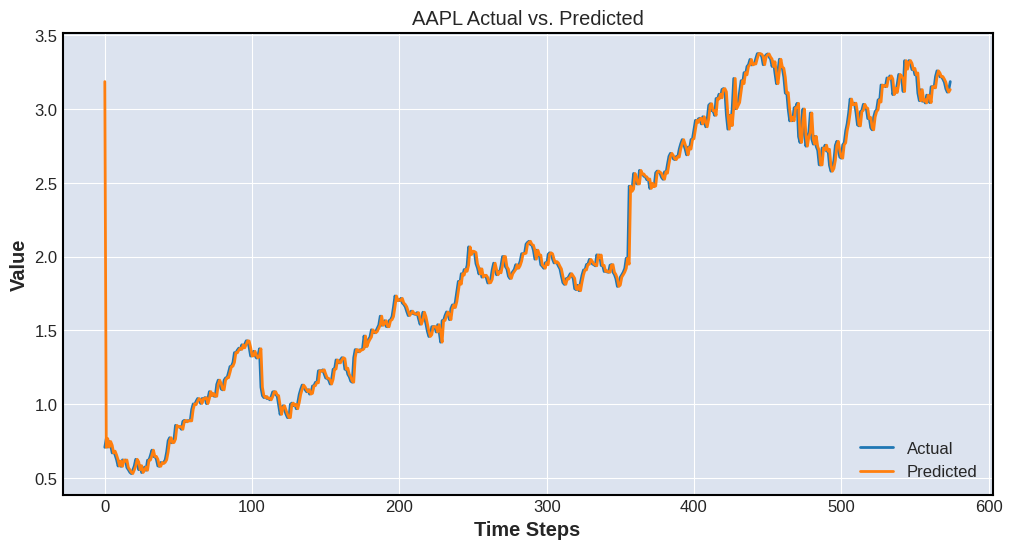

mse: 0.001191 - mae: 0.018612 - mape: 0.02%


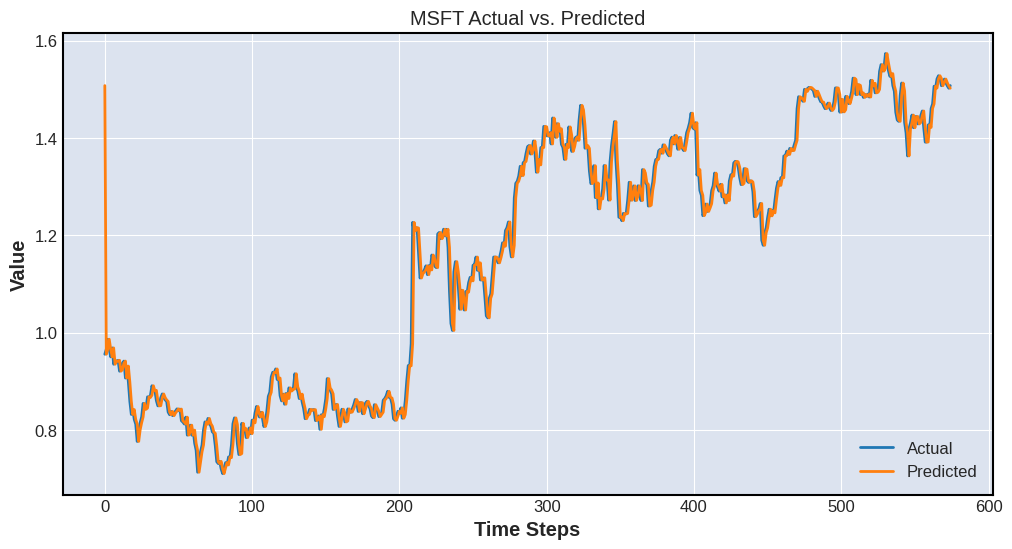

mse: 0.001526 - mae: 0.018595 - mape: 0.01%


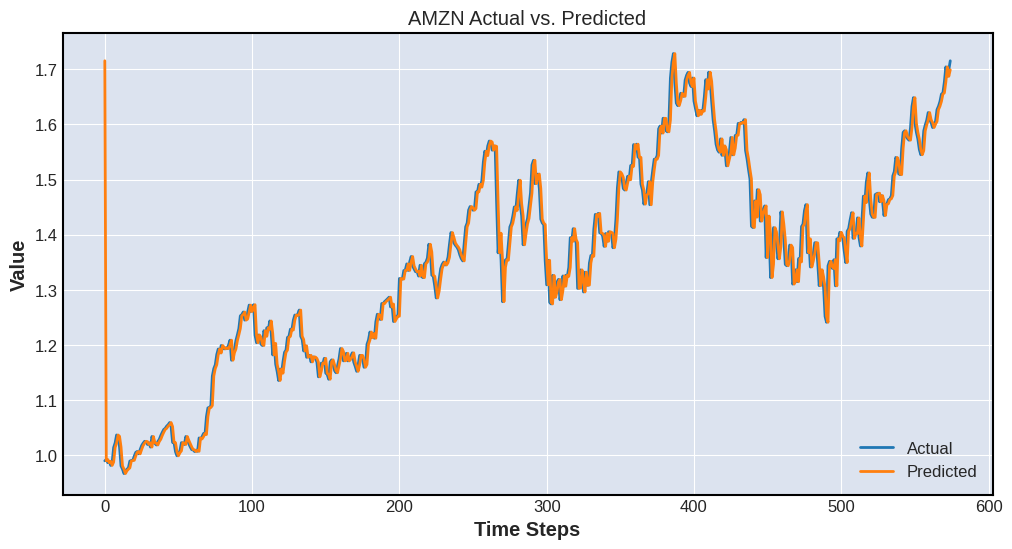

mse: 0.004731 - mae: 0.021754 - mape: 0.02%


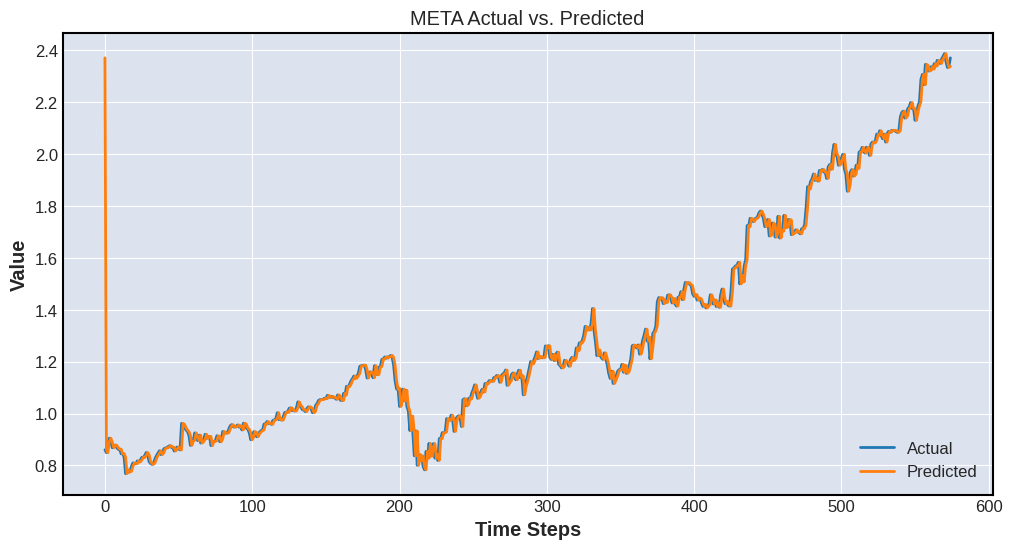

mse: 0.000384 - mae: 0.014610 - mape: 0.02%


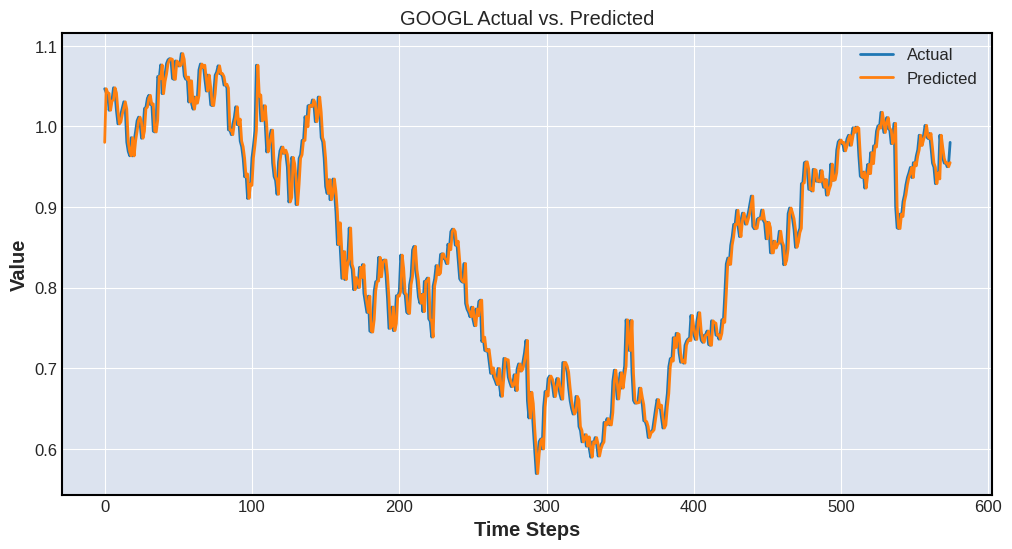

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

for i in range(len(symboles)):
    predictions = np.roll(Y_test[i], shift=1)
    mse = mean_squared_error(Y_test[i], predictions)
    mae = mean_absolute_error(Y_test[i], predictions)
    mape = mean_absolute_percentage_error(Y_test[i], predictions)

    print(f"mse: {mse:.6f} - mae: {mae:.6f} - mape: {mape:.2f}%")
    plt.figure(figsize=(12, 6))
    plt.plot(Y_test[i], label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(symboles[i] + ' Actual vs. Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.legend()
    plt.show()